In [2]:
import sys
sys.path.append('..')

from sklearn.datasets import make_regression

import numpy as np
from src import grad_desc_algos as gda



import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline

## Import dataset

In [3]:
features, target, coef = make_regression(n_samples=1000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=10.0,
                                         coef = True,
                                         random_state=1)

## Batch Gradient Descent

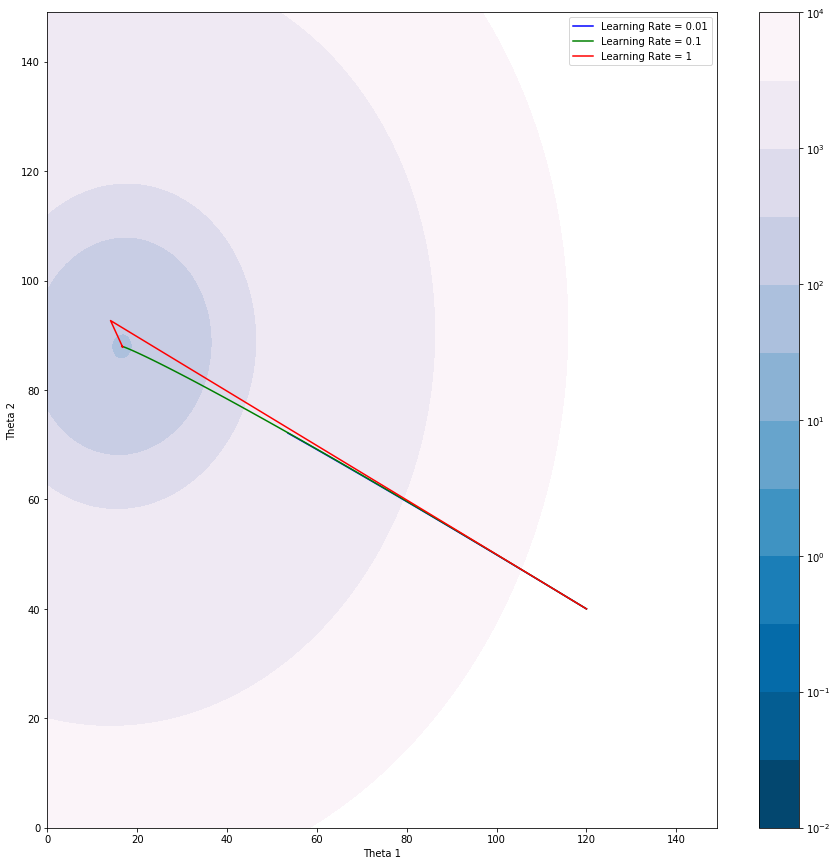

Final thetas: [16.61830202 87.98176447]
Actual Coefficents: [16.88001901 87.91985605]


In [4]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(15, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

epochs = 100

learing = [0.01, 0.1, 1]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    #thetas, MSE = batch_gradient_descent(features, target, theta, lr, epochs)
    thetas, MSE = gda.batch_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Stochastic Gradient Descent

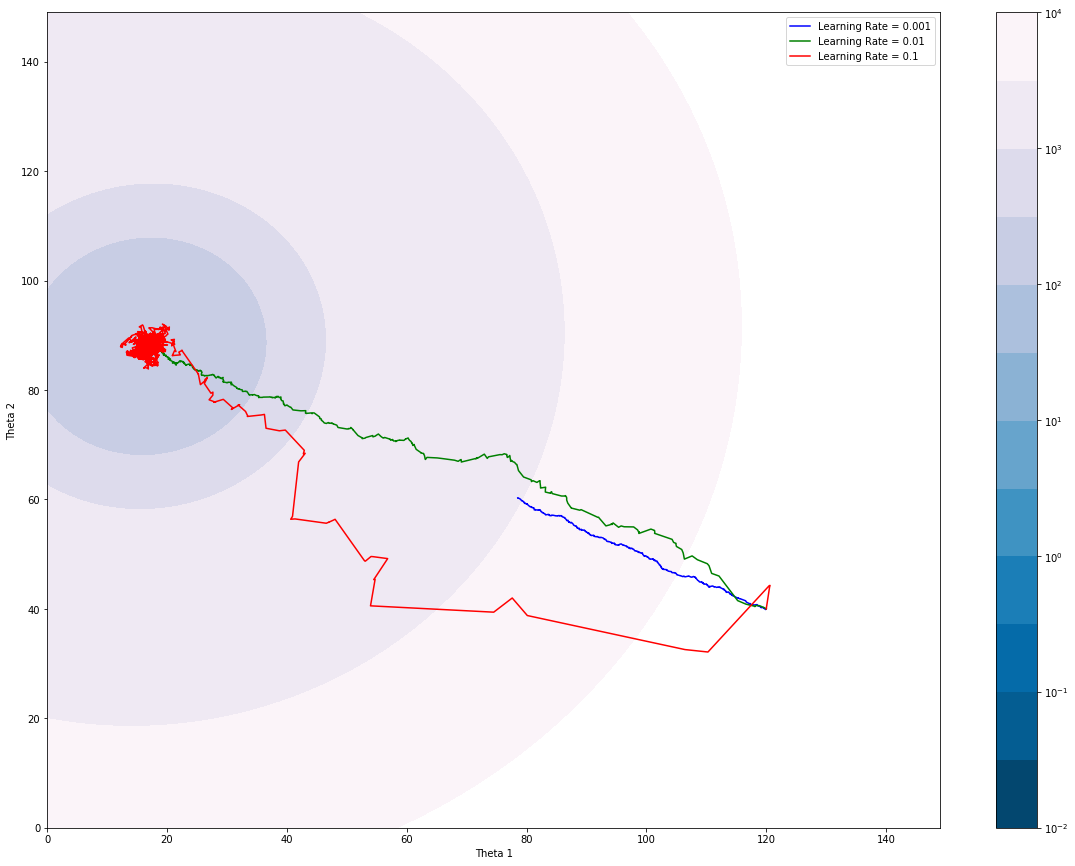

Final thetas: [15.81715603 85.75513234]
Actual Coefficents: [16.88001901 87.91985605]


In [5]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.001, 0.01, 0.1]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 100

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = gda.stochastic_gradient_descent(features, target, theta, lr, epochs)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

In [6]:
## Compare to each other. 
## minibatch GD